# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [ ]:
import numpy as np
import keras
from keras import layers

## Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 6ms/step - loss: 0.3614 - accuracy: 0.8905 - val_loss: 0.0807 - val_accuracy: 0.9777
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1142 - accuracy: 0.9651 - val_loss: 0.0554 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0874 - accuracy: 0.9728 - val_loss: 0.0511 - val_accuracy: 0.9863
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0744 - accuracy: 0.9765 - val_loss: 0.0429 - val_accuracy: 0.9893
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0376 - val_accuracy: 0.9890
Epoch 

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02425769716501236
Test accuracy: 0.9922000169754028


In [ ]:
prediction = model.predict(x_test)
prediction[1]

313/313 [==============================] - 1s 2ms/step


array([1.3637104e-05, 2.8829811e-06, 9.9996710e-01, 5.0715689e-09,
       7.4563015e-11, 3.6385842e-12, 1.4815376e-05, 4.3260819e-11,
       1.5844914e-06, 6.3797752e-13], dtype=float32)

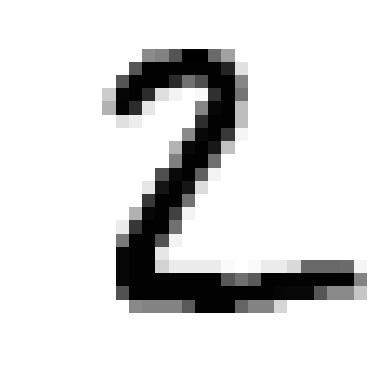

In [ ]:
import matplotlib.pyplot as plt

img = plt.imshow(1-x_test[1])
img.set_cmap('gray')
plt.axis('off')
plt.show()